In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [18]:
water=pd.read_csv("D:\ds project datasets\water_potability.csv")
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [19]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [21]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [22]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [23]:
water["ph"].fillna(value=water["ph"].mean(), inplace=True)
water["Trihalomethanes"].fillna(value=water["Trihalomethanes"].mean(), inplace=True)

In [24]:
water.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [25]:
water["Sulfate"].fillna(value=water["Sulfate"].mean(), inplace=True)

In [26]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Text(0.5, 1.0, 'Correlation Heatmap')

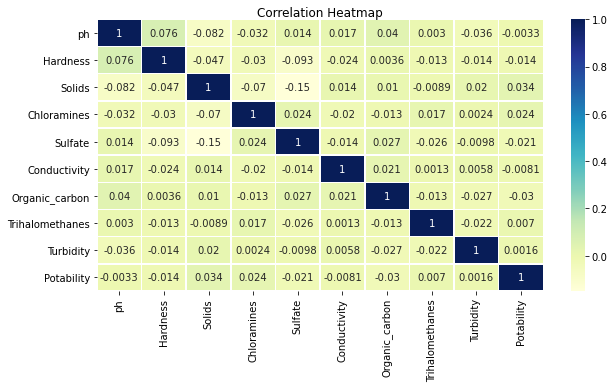

In [27]:
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(water.corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2)

In [28]:
x=water.drop("Potability",axis=1)
y=water.Potability
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.3, random_state=42) 
    
tree = DecisionTreeClassifier()
tree.fit(x_train_new, y_train_new)
    
pred_new = tree.predict(x_test_new)
    
acc_new = tree.score(x_test_new, y_test_new)
a = mean_absolute_error(y_test_new, pred_new)
print("Acurray on test set: {:.2f}%".format(acc_new*100))
print("mean_absolute_error of the test set: {:.2f}".format(a))
    

Acurray on test set: 55.54%
mean_absolute_error of the test set: 0.44


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
RF = RandomForestRegressor( random_state = 1)
RF.fit(x_train_new, y_train_new) 
y_pred_test = RF.predict(x_test_new)
acc_new = RF.score(x_test_new, y_test_new)
b=mean_absolute_error(y_test_new,y_pred_test )
print("Acurray on test set: {:.2f}%".format(acc_new*100))
print("mean_absolute_error of the test set: {:.2f}".format(b))

Acurray on test set: 11.69%
mean_absolute_error of the test set: 0.42


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(solver='liblinear', random_state = 0)
logreg.fit(x_train_new, y_train_new) 
y_pred_test = logreg.predict(x_test_new)
acc_new = logreg.score(x_test_new, y_test_new)
b=mean_absolute_error(y_test_new,y_pred_test )
print("Acurray on test set: {:.2f}%".format(acc_new*100))
print("mean_absolute_error of the test set: {:.2f}".format(b))

Acurray on test set: 62.77%
mean_absolute_error of the test set: 0.37


([<matplotlib.patches.Wedge at 0x1e0030d0fd0>,
 [Text(-0.3722543665175176, 1.0350974285586076, ''),
  Text(0.3722543665175174, -1.0350974285586076, '')],
 [Text(-0.2030478362822823, 0.5645985973956041, '61.0%'),
  Text(0.2030478362822822, -0.5645985973956041, '39.0%')])

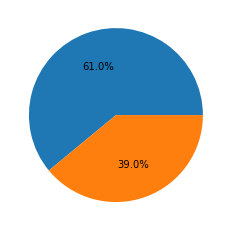

In [31]:
plt.pie(data=water,x=water["Potability"].value_counts(),autopct='%1.1f%%')